# Gradient Descent with Autograd and Backpropagation

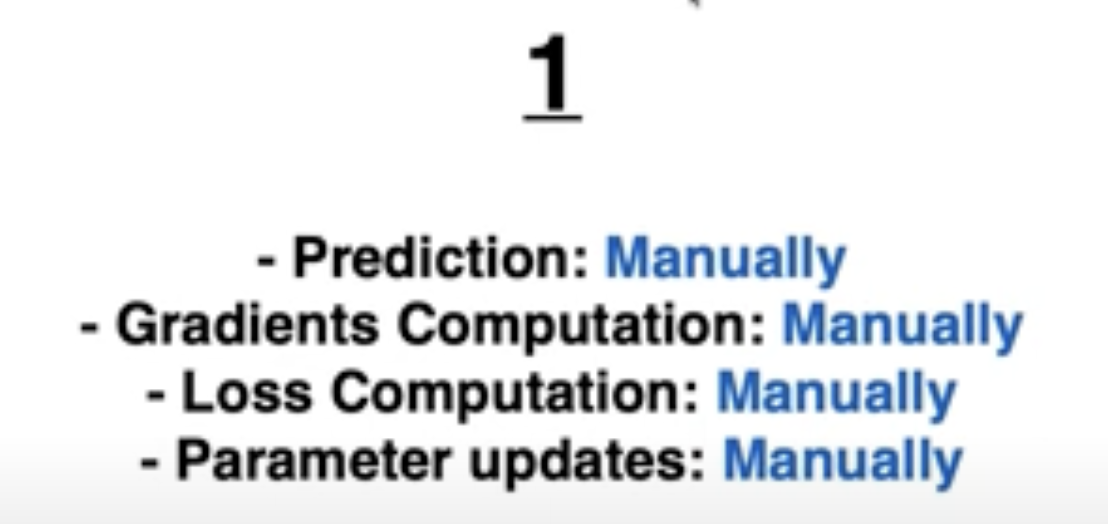

In [6]:
import numpy as np

# f = w*x

# f = 2*x

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x 

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction for training: f(5) = {forward(5):.3f}')

# Training 
learning_rate = 0.01
n_iters =20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    # loss 
    l = loss(Y, y_pred)

    # dradient
    dw = gradient(X, Y, y_pred)

    # update the weights
    w -= learning_rate*dw

    if epoch % 2 ==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction for training: f(5) = {forward(5):.3f}')



Prediction for training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 21: w = 2.000, loss = 0.00000000
epoch 23: w = 2.000, loss = 0.00000000
epoch 25: w = 2.000, loss = 0.00000000
epoch 27: w = 2.000, loss = 0.00000000
epoch 29: w = 2.000, loss = 0.00000000
epoch 31: w = 2.000, loss = 0.00000000
epoch 33: w = 2.000, loss = 0.00000000
epoch 35: w = 2.000, loss = 0.00000000
epoch 37: w = 2.000, loss = 0.00000000
epoch 39: w = 2.000, loss = 0.00000000
epoch 41: w = 2.000, loss = 0.00000000
epoch 43: w = 2.000, loss = 0.00000000
epoch 45: w = 2.000, loss = 0.00000000
epoch 47: w = 2.000, loss = 0.00000000
epoch 49: w = 2.000, loss = 0.

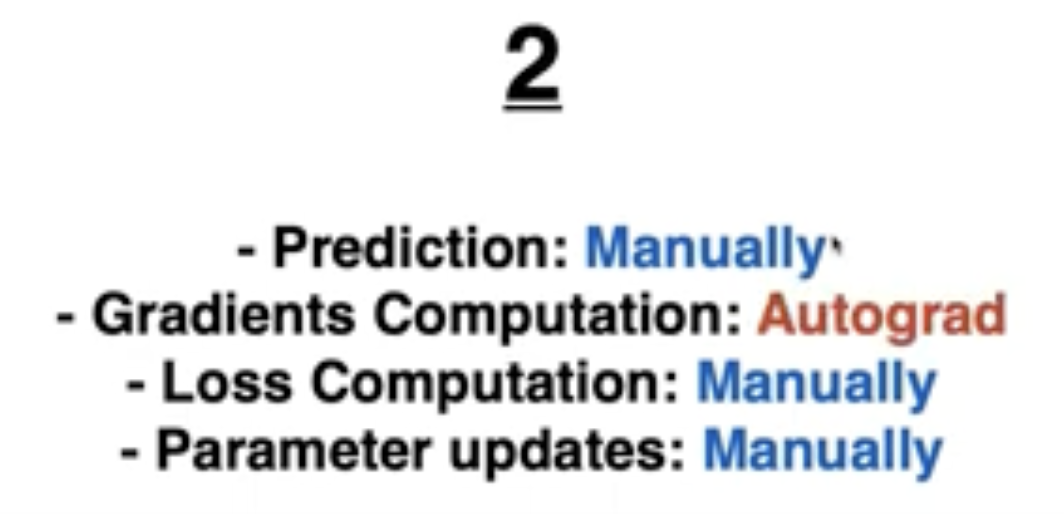

In [12]:
import torch

# f = w*x

# f = 2*x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x 

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# gradient


print(f'Prediction for training: f(5) = {forward(5):.3f}')

# Training 
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    # loss 
    l = loss(Y, y_pred)

    # dradient =  backward prop
    l.backward()  # dl/w

    # update the weights
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero gradients
    w.grad.zero_()

    if epoch % 10 ==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction for training: f(5) = {forward(5):.3f}')



Prediction for training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction for training: f(5) = 10.000


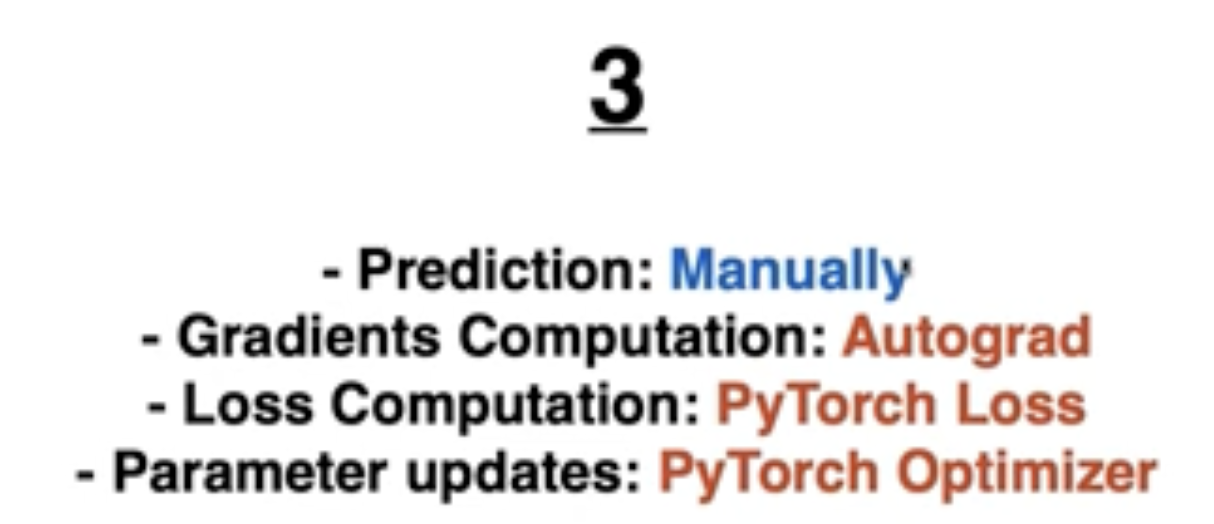

In [15]:
# 1) Design model(input, output, size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights


import torch
import torch.nn as nn

# f = w*x

# f = 2*x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x 

print(f'Prediction for training: f(5) = {forward(5):.3f}')

# Training 
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    # loss 
    l = loss(Y, y_pred)

    # dradient =  backward prop
    l.backward()  # dl/w

    # update the weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if epoch % 1 ==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction for training: f(5) = {forward(5):.3f}')


Prediction for training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018772
epoch 4: w = 0.956, loss = 11.31448650
epoch 5: w = 1.113, loss = 8.17471695
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939169
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011245
epoch 13: w = 1.758, loss = 0.60698116
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.31684780
epoch 16: w = 1.851, loss = 0.22892261
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237914
epoch 21: w = 1.934, loss = 0.04506890
epoch 22: w = 1.944, loss = 0.03256231
epoch 23: w = 1.952, loss = 0.02352631
epoch 24: w = 1.960, loss = 0.01699772
epoch 25: w = 1.966, loss = 0.0

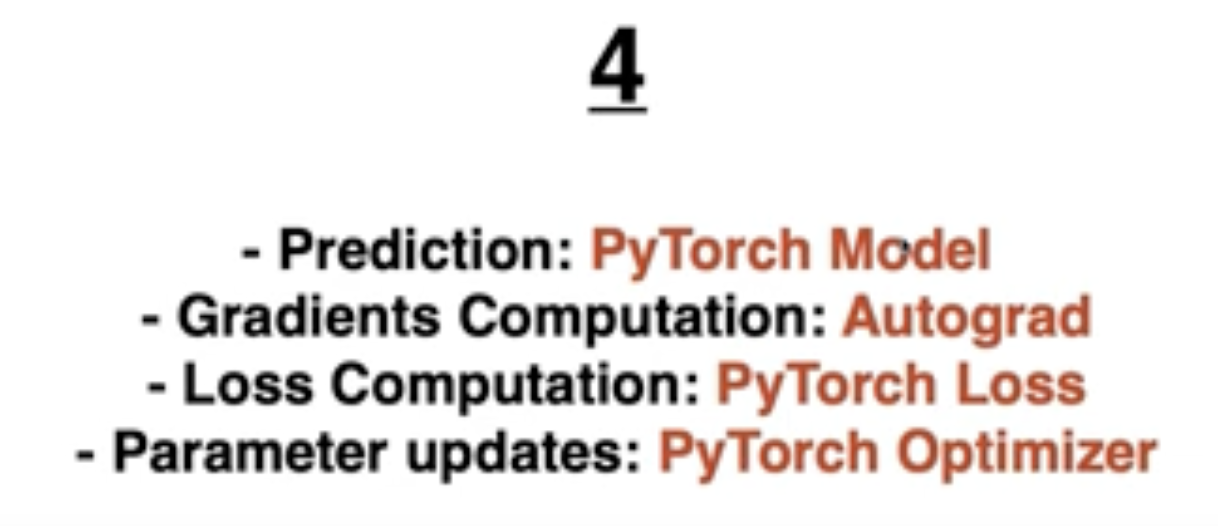

In [10]:
# 1) Design model(input, output, size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights


import torch
import torch.nn as nn

# f = w*x

# f = 2*x

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features  = X.shape

input_size = n_features
output_size = n_features


# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

print(f'Prediction for training: f(5) = {model(X_test).item():.3f}')

# Training 
learning_rate = 0.05
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)

    # loss 
    l = loss(Y, y_pred)

    # dradient =  backward prop
    l.backward()  # dl/w

    # update the weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if epoch % 10 ==0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction for training: f(5) = {model(X_test).item():.3f}')


Prediction for training: f(5) = -2.491
epoch 1: w = 1.328, loss = 46.02542877
epoch 11: w = 1.737, loss = 0.10296376
epoch 21: w = 1.774, loss = 0.07615137
epoch 31: w = 1.805, loss = 0.05632112
epoch 41: w = 1.833, loss = 0.04165474
epoch 51: w = 1.856, loss = 0.03080762
epoch 61: w = 1.876, loss = 0.02278510
epoch 71: w = 1.894, loss = 0.01685175
epoch 81: w = 1.908, loss = 0.01246344
epoch 91: w = 1.921, loss = 0.00921789
Prediction for training: f(5) = 9.858
